<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/autogluon_M1_next_day_graph_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autogluon

     |████████████████████████████████| 56 kB 1.3 MB/s 
     |████████████████████████████████| 273 kB 48.6 MB/s 
     |████████████████████████████████| 352 kB 36.7 MB/s 
     |████████████████████████████████| 52 kB 1.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 210 kB 59.9 MB/s 
     |████████████████████████████████| 131 kB 55.7 MB/s 
     |████████████████████████████████| 802 kB 52.8 MB/s 
     |████████████████████████████████| 4.2 MB 44.2 MB/s 
     |████████████████████████████████| 27.4 MB 1.3 MB/s 
     |████████████████████████████████| 1.3 MB 57.1 MB/s 
     |████████████████████████████████| 119 kB 53.8 MB/s 
     |████████████████████████████████| 3.0 MB 33.2 MB/s 
     |████████████████████████████████| 296 kB 47.5 MB/s 
     |████████████████████████████████| 189 kB 40.6 MB/s 
     |████████████████████████████████| 166.7 MB 14 kB/s 
     |████████████████████████████████| 67.3 MB 12 kB/s 
     |█████████████

In [3]:
!pip install --upgrade mxnet

In [1]:
#designed for Jupyter/kaggle/colab
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor  

In [2]:
 #MT4 csv 
df=pd.read_csv('EURUSD1.csv', names=['d','t','eu_o','eu_h','eu_l','eu_c','eu_v'])


# df2=pd.read_csv('GBPUSD1440.csv', names=['d','t','gu_o','gu_h','gu_l','gu_c','gu_v'])
# df2 = df2.tail(2000)

# df3=pd.read_csv('USDCAD1440.csv', names=['d','t','uc_o','uc_h','uc_l','uc_c','uc_v'])
# df3 = df3.tail(2000)

# df4=pd.read_csv('USDCHF1440.csv', names=['d','t','uf_o','uf_h','uf_l','uf_c','uf_v'])
# df4 = df4.tail(2000)

# df5=pd.read_csv('USDJPY1440.csv', names=['d','t','uj_o','uj_h','uj_l','uj_c','uj_v'])
# df5 = df5.tail(2000)

# df6=pd.read_csv('USDSEK1440.csv', names=['d','t','us_o','us_h','us_l','us_c','us_v'])
# df6 = df6.tail(2000)

# #using merge
# df_m_1 = df1.merge(df2, on='d')
# df_m_2 = df_m_1.merge(df3, on='d')
# df_m_3 = df_m_2.merge(df4, on='d')
# df_m_4 = df_m_3.merge(df5, on='d')
# df_m_5 = df_m_4.merge(df6, on='d')
# df_m_5 = df_m_5.drop(columns='t_x')
# df_m_5 = df_m_5.drop(columns='t_y')

# pd.set_option('display.max_columns', None)
# print(df_m_5) 

In [3]:
df=pd.DataFrame(data=df.tail(50000))
df

,d,t,eu_o,eu_h,eu_l,eu_c,eu_v
15000,2021.11.03,19:46,1.15788,1.15792,1.15777,1.15781,42
15001,2021.11.03,19:47,1.15780,1.15787,1.15780,1.15787,67
15002,2021.11.03,19:48,1.15787,1.15793,1.15785,1.15792,51
15003,2021.11.03,19:49,1.15790,1.15807,1.15790,1.15801,92
15004,2021.11.03,19:50,1.15800,1.15817,1.15800,1.15807,82
...,...,...,...,...,...,...,...
64995,2021.12.24,23:50,1.13210,1.13210,1.13055,1.13182,17
64996,2021.12.24,23:51,1.13181,1.13200,1.13181,1.13181,13
64997,2021.12.24,23:52,1.13179,1.13198,1.13063,1.13068,14
64998,2021.12.24,23:53,1.13071,1.13125,1.13036,1.13105,19


In [4]:
df = df.drop(['eu_o','eu_h','eu_l','eu_v'], axis=1)

In [5]:
pd.set_option('display.max_columns', 100)
df 


,d,t,eu_c
15000,2021.11.03,19:46,1.15781
15001,2021.11.03,19:47,1.15787
15002,2021.11.03,19:48,1.15792
15003,2021.11.03,19:49,1.15801
15004,2021.11.03,19:50,1.15807
...,...,...,...
64995,2021.12.24,23:50,1.13182
64996,2021.12.24,23:51,1.13181
64997,2021.12.24,23:52,1.13068
64998,2021.12.24,23:53,1.13105


In [6]:
df = df.drop(['d','t'], axis=1)

In [7]:
df4 = pd.DataFrame(data=df.iloc[-5760:-4320])
df4['row_num']=np.arange(len(df4))
df4.set_index('row_num',inplace=True)
df4 = df4.rename(columns={'eu_c':'day_4'})

print(df4)

df3 = pd.DataFrame(data=df.iloc[-4320:-2880])
df3['row_num']=np.arange(len(df3))
df3.set_index('row_num',inplace=True)
df3 = df3.rename(columns={'eu_c':'day_3'})

print(df3)

df2 = pd.DataFrame(data=df.iloc[-2880:-1440])
df2['row_num']=np.arange(len(df2))
df2.set_index('row_num',inplace=True)
df2 = df2.rename(columns={'eu_c':'day_2'})

print(df2)

df1 = pd.DataFrame(data=df.iloc[-1440:])
df1['row_num']=np.arange(len(df1))
df1.set_index('row_num',inplace=True)
df1 = df1.rename(columns={'eu_c':'day_1'})
print(df1)


           day_4
row_num         
0        1.12763
1        1.12754
2        1.12764
3        1.12763
4        1.12756
...          ...
1435     1.12808
1436     1.12808
1437     1.12812
1438     1.12811
1439     1.12811

[1440 rows x 1 columns]
           day_3
row_num         
0        1.12795
1        1.12800
2        1.12800
3        1.12800
4        1.12806
...          ...
1435     1.13327
1436     1.13325
1437     1.13325
1438     1.13322
1439     1.13323

[1440 rows x 1 columns]
           day_2
row_num         
0        1.13332
1        1.13323
2        1.13317
3        1.13305
4        1.13308
...          ...
1435     1.13270
1436     1.13271
1437     1.13271
1438     1.13270
1439     1.13276

[1440 rows x 1 columns]
           day_1
row_num         
0        1.13274
1        1.13278
2        1.13270
3        1.13280
4        1.13281
...          ...
1435     1.13182
1436     1.13181
1437     1.13068
1438     1.13105
1439     1.13133

[1440 rows x 1 columns]


In [8]:
df_train = pd.concat([df4,df3,df2,df1], axis=1)
df_train = pd.DataFrame(data=df_train)
df_train


,day_4,day_3,day_2,day_1
row_num,,,,
0,1.12763,1.12795,1.13332,1.13274
1,1.12754,1.12800,1.13323,1.13278
2,1.12764,1.12800,1.13317,1.13270
3,1.12763,1.12800,1.13305,1.13280
4,1.12756,1.12806,1.13308,1.13281
...,...,...,...,...
1435,1.12808,1.13327,1.13270,1.13182
1436,1.12808,1.13325,1.13271,1.13181
1437,1.12812,1.13325,1.13271,1.13068


In [26]:
df_test = pd.concat([df3,df2,df1], axis=1)
df_test['pred_col'] =0
df_test.rename(columns={'day_3': 'day_4', 'day_2': 'day_3','day_1':'day_2','pred_col':'day_1'}, inplace=True)
df_test = pd.DataFrame(data=df_test)
df_test

,day_4,day_3,day_2,day_1
row_num,,,,
0,1.12795,1.13332,1.13274,0
1,1.12800,1.13323,1.13278,0
2,1.12800,1.13317,1.13270,0
3,1.12800,1.13305,1.13280,0
4,1.12806,1.13308,1.13281,0
...,...,...,...,...
1435,1.13327,1.13270,1.13182,0
1436,1.13325,1.13271,1.13181,0
1437,1.13325,1.13271,1.13068,0


In [ ]:

# #Features
# #1 day ago (features)
# df_m_5['eu_High_last_day1'] = df_m_5['eu_h'].shift(1)
# df_m_5['eu_Low_last_day1'] = df_m_5['eu_l'].shift(1)
# df_m_5['eu_Close_last_day1'] = df_m_5['eu_c'].shift(1) 
# #2 days ago
# df_m_5['eu_High_last_day2'] = df_m_5['eu_h'].shift(2)
# df_m_5['eu_Low_last_day2'] = df_m_5['eu_l'].shift(2)
# df_m_5['eu_Close_last_day2'] = df_m_5['eu_c'].shift(2) 
# #3 days ago
# df_m_5['eu_High_last_day3'] = df_m_5['eu_h'].shift(3)
# df_m_5['eu_Low_last_day3'] = df_m_5['eu_l'].shift(3)
# df_m_5['eu_Close_last_day3'] = df_m_5['eu_c'].shift(3) 
# #4 days ago 
# df_m_5['eu_High_last_day4'] = df_m_5['eu_h'].shift(4)
# df_m_5['eu_Low_last_day4'] = df_m_5['eu_l'].shift(4)
# df_m_5['eu_Close_last_day4'] = df_m_5['eu_c'].shift(4) 
# #5 days ago
# df_m_5['eu_High_last_day5'] = df_m_5['eu_h'].shift(5)
# df_m_5['eu_Low_last_day5'] = df_m_5['eu_l'].shift(5)
# df_m_5['eu_Close_last_day5'] = df_m_5['eu_c'].shift(5) 
# #6 day ago (features)
# df_m_5['eu_High_last_day6'] = df_m_5['eu_h'].shift(6)
# df_m_5['eu_Low_last_day6'] = df_m_5['eu_l'].shift(6)
# df_m_5['eu_Close_last_day6'] = df_m_5['eu_c'].shift(6) 
# #7 days ago
# df_m_5['eu_High_last_day7'] = df_m_5['eu_h'].shift(7)
# df_m_5['eu_Low_last_day7'] = df_m_5['eu_l'].shift(7)
# df_m_5['eu_Close_last_day7'] = df_m_5['eu_c'].shift(7) 
# #8 days ago
# df_m_5['eu_High_last_day8'] = df_m_5['eu_h'].shift(8)
# df_m_5['eu_Low_last_day8'] = df_m_5['eu_l'].shift(8)
# df_m_5['eu_Close_last_day8'] = df_m_5['eu_c'].shift(8) 
# #9 days ago 
# df_m_5['eu_High_last_day9'] = df_m_5['eu_h'].shift(9)
# df_m_5['eu_Low_last_day9'] = df_m_5['eu_l'].shift(9)
# df_m_5['eu_Close_last_day9'] = df_m_5['eu_c'].shift(9) 
# #10 days ago
# df_m_5['eu_High_last_day10'] = df_m_5['eu_h'].shift(10)
# df_m_5['eu_Low_last_day10'] = df_m_5['eu_l'].shift(10)
# df_m_5['eu_Close_last_day10'] = df_m_5['eu_c'].shift(10) 

# #11 day ago (features)
# df_m_5['eu_High_last_day11'] = df_m_5['eu_h'].shift(11)
# df_m_5['eu_Low_last_day11'] = df_m_5['eu_l'].shift(11)
# df_m_5['eu_Close_last_day11'] = df_m_5['eu_c'].shift(11) 
# #12 days ago
# df_m_5['eu_High_last_day12'] = df_m_5['eu_h'].shift(12)
# df_m_5['eu_Low_last_day12'] = df_m_5['eu_l'].shift(12)
# df_m_5['eu_Close_last_day12'] = df_m_5['eu_c'].shift(12) 
# #13 days ago
# df_m_5['eu_High_last_day13'] = df_m_5['eu_h'].shift(13)
# df_m_5['eu_Low_last_day13'] = df_m_5['eu_l'].shift(13)
# df_m_5['eu_Close_last_day13'] = df_m_5['eu_c'].shift(13) 
# #14 days ago 
# df_m_5['eu_High_last_day14'] = df_m_5['eu_h'].shift(14)
# df_m_5['eu_Low_last_day14'] = df_m_5['eu_l'].shift(14)
# df_m_5['eu_Close_last_day14'] = df_m_5['eu_c'].shift(14) 
# #15 days ago
# df_m_5['eu_High_last_day15'] = df_m_5['eu_h'].shift(15)
# df_m_5['eu_Low_last_day15'] = df_m_5['eu_l'].shift(15)
# df_m_5['eu_Close_last_day15'] = df_m_5['eu_c'].shift(15) 
# #16 day ago (features)
# df_m_5['eu_High_last_day16'] = df_m_5['eu_h'].shift(16)
# df_m_5['eu_Low_last_day16'] = df_m_5['eu_l'].shift(16)
# df_m_5['eu_Close_last_day16'] = df_m_5['eu_c'].shift(16) 
# #17 days ago
# df_m_5['eu_High_last_day17'] = df_m_5['eu_h'].shift(17)
# df_m_5['eu_Low_last_day17'] = df_m_5['eu_l'].shift(17)
# df_m_5['eu_Close_last_day17'] = df_m_5['eu_c'].shift(17) 
# #18 days ago
# df_m_5['eu_High_last_day18'] = df_m_5['eu_h'].shift(18)
# df_m_5['eu_Low_last_day18'] = df_m_5['eu_l'].shift(18)
# df_m_5['eu_Close_last_day18'] = df_m_5['eu_c'].shift(18) 
# #19 days ago 
# df_m_5['eu_High_last_day19'] = df_m_5['eu_h'].shift(19)
# df_m_5['eu_Low_last_day19'] = df_m_5['eu_l'].shift(19)
# df_m_5['eu_Close_last_day19'] = df_m_5['eu_c'].shift(19) 
# #20 days ago
# df_m_5['eu_High_last_day20'] = df_m_5['eu_h'].shift(20)
# df_m_5['eu_Low_last_day20'] = df_m_5['eu_l'].shift(20)
# df_m_5['eu_Close_last_day20'] = df_m_5['eu_c'].shift(20) 

# #21 day ago (features)
# df_m_5['eu_High_last_day21'] = df_m_5['eu_h'].shift(21)
# df_m_5['eu_Low_last_day21'] = df_m_5['eu_l'].shift(21)
# df_m_5['eu_Close_last_day21'] = df_m_5['eu_c'].shift(21) 
# #22 days ago
# df_m_5['eu_High_last_day22'] = df_m_5['eu_h'].shift(22)
# df_m_5['eu_Low_last_day22'] = df_m_5['eu_l'].shift(22)
# df_m_5['eu_Close_last_day22'] = df_m_5['eu_c'].shift(22) 
# #23 days ago
# df_m_5['eu_High_last_day23'] = df_m_5['eu_h'].shift(23)
# df_m_5['eu_Low_last_day23'] = df_m_5['eu_l'].shift(23)
# df_m_5['eu_Close_last_day23'] = df_m_5['eu_c'].shift(23) 
# #24 days ago 
# df_m_5['eu_High_last_day24'] = df_m_5['eu_h'].shift(24)
# df_m_5['eu_Low_last_day24'] = df_m_5['eu_l'].shift(24)
# df_m_5['eu_Close_last_day24'] = df_m_5['eu_c'].shift(24) 
# #25 days ago
# df_m_5['eu_High_last_day25'] = df_m_5['eu_h'].shift(25)
# df_m_5['eu_Low_last_day25'] = df_m_5['eu_l'].shift(25)
# df_m_5['eu_Close_last_day25'] = df_m_5['eu_c'].shift(25) 
# #26 day ago (features)
# df_m_5['eu_High_last_day26'] = df_m_5['eu_h'].shift(26)
# df_m_5['eu_Low_last_day26'] = df_m_5['eu_l'].shift(26)
# df_m_5['eu_Close_last_day26'] = df_m_5['eu_c'].shift(26) 
# #27 days ago
# df_m_5['eu_High_last_day27'] = df_m_5['eu_h'].shift(27)
# df_m_5['eu_Low_last_day27'] = df_m_5['eu_l'].shift(27)
# df_m_5['eu_Close_last_day27'] = df_m_5['eu_c'].shift(27) 
# #28 days ago
# df_m_5['eu_High_last_day28'] = df_m_5['eu_h'].shift(28)
# df_m_5['eu_Low_last_day28'] = df_m_5['eu_l'].shift(28)
# df_m_5['eu_Close_last_day28'] = df_m_5['eu_c'].shift(28) 
# #29 days ago 
# df_m_5['eu_High_last_day29'] = df_m_5['eu_h'].shift(29)
# df_m_5['eu_Low_last_day29'] = df_m_5['eu_l'].shift(29)
# df_m_5['eu_Close_last_day29'] = df_m_5['eu_c'].shift(29) 
# #30 days ago
# df_m_5['eu_High_last_day30'] = df_m_5['eu_h'].shift(30)
# df_m_5['eu_Low_last_day30'] = df_m_5['eu_l'].shift(30)
# df_m_5['eu_Close_last_day30'] = df_m_5['eu_c'].shift(30) 

# #Target
# #1 day forward 
# df_m_5['eu_High_next_day1'] = df_m_5['eu_h'].shift(-1)
# df_m_5['eu_Low_next_day1'] = df_m_5['eu_l'].shift(-1)
# df_m_5['eu_Close_next_day1'] = df_m_5['eu_c'].shift(-1) 

# #drop null and useless columns
# df_m_5 = df_m_5.dropna()
# df_m_5 = df_m_5.drop(['d','t','eu_o','eu_v'], axis=1)



In [95]:
# extra_clone = pd.DataFrame(data=df_train)
# print(extra_clone)


           day_4    day_3    day_2    day_1
row_num                                    
0        1.12763  1.12795  1.13332  1.13274
1        1.12754  1.12800  1.13323  1.13278
2        1.12764  1.12800  1.13317  1.13270
3        1.12763  1.12800  1.13305  1.13280
4        1.12756  1.12806  1.13308  1.13281
...          ...      ...      ...      ...
1435     1.12808  1.13327  1.13270  1.13182
1436     1.12808  1.13325  1.13271  1.13181
1437     1.12812  1.13325  1.13271  1.13068
1438     1.12811  1.13322  1.13270  1.13105
1439     1.12811  1.13323  1.13276  1.13133

[1440 rows x 4 columns]


In [96]:
# extra_clone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day_4   1440 non-null   float64
 1   day_3   1440 non-null   float64
 2   day_2   1440 non-null   float64
 3   day_1   1440 non-null   float64
dtypes: float64(4)
memory usage: 56.2 KB


In [36]:
# #extract yesterday's row to predict today's row
# #check if needs to be pd.DataFrame
# last_row = pd.DataFrame(data=extra_clone.iloc[-10:,np.r_[0:93]])
# last_row

In [35]:
# df_m_5 = pd.DataFrame(data=df_m_5.tail(8000))
# df_m_5

In [97]:
# #create initial train and test data as pd.DF
# #final test DF is last_row
# df_train = pd.DataFrame(data=df_post.iloc[0:1500,:])
# df_test = pd.DataFrame(data=df_post.iloc[700:1400,:])
# print(df_post_train)
# print(df_post_test)

               4        3        2  pred_col
row_num                                     
0        1.12763  1.12795  1.13332   1.13274
1        1.12754  1.12800  1.13323   1.13278
2        1.12764  1.12800  1.13317   1.13270
3        1.12763  1.12800  1.13305   1.13280
4        1.12756  1.12806  1.13308   1.13281
...          ...      ...      ...       ...
695      1.12999  1.12733  1.13164   1.13403
696      1.13001  1.12728  1.13177   1.13401
697      1.13001  1.12713  1.13172   1.13395
698      1.12999  1.12719  1.13164   1.13392
699      1.12998  1.12733  1.13158   1.13401

[700 rows x 4 columns]
               4        3        2  pred_col
row_num                                     
700      1.12994  1.12729  1.13153   1.13404
701      1.13002  1.12732  1.13144   1.13403
702      1.13012  1.12730  1.13165   1.13404
703      1.12996  1.12724  1.13171   1.13404
704      1.12978  1.12719  1.13172   1.13407
...          ...      ...      ...       ...
1395     1.12812  1.13342  1.13

In [ ]:
# #new column: high vs low
# df_m_5['eu_h_or_l'] = ((df_m_5.eu_h - df_m_5.eu_o) > (df_m_5.eu_o - df_m_5.eu_l)) 
# df_m_5.eu_h_or_l = df_m_5.eu_h_or_l.replace({True:1,False:0})

# #new column: close vs yesterday
# df_m_5['eu_c_vs_c'] = (df_m_5.eu_c > df_m_5.eu_o) 
# df_m_5.eu_c_vs_c = df_m_5.eu_c_vs_c.replace({True:1,False:0})

# #new column: shift tomorrow to today
# df_m_5['eu_High_next_day'] = df_m_5['eu_h'].shift(-1)
# df_m_5['eu_Low_next_day'] = df_m_5['eu_l'].shift(-1)
# df_m_5['eu_Close_next_day'] = df_m_5['eu_c'].shift(-1)
# df_m_5 = df_m_5.dropna()


In [24]:

# print(df_post_train.isna().sum())
# print(df_post_test.isna().sum())

1    0
2    0
3    0
4    0
dtype: int64
1    0
2    0
3    0
4    0
dtype: int64


In [19]:
# print(df_post_train.info())
# print(df_post_test.info())


In [20]:
#predict new interval
label_new_interval = 'day_1' 
print("Summary of class variable: \n", df_train[label_new_interval].describe())

Summary of class variable: 
 count    1440.000000
mean        1.132451
std         0.000907
min         1.130300
25%         1.131810
50%         1.132520
75%         1.133023
max         1.134290
Name: day_1, dtype: float64


In [21]:
#predict new interval
save_path='agModels-predict_day1'
predictor = TabularPredictor(label=label_new_interval, path=save_path)
predictor.fit(df_train)#, presets='best_quality')
#.fit(presets='best_quality) is slower

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predict_day1/"
AutoGluon Version:  0.3.1
Train Data Rows:    1440
Train Data Columns: 3
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.13429, 1.1303, 1.13245, 0.00091)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11961.06 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	St

[1000]	train_set's rmse: 0.000191476	valid_set's rmse: 0.000231218
[2000]	train_set's rmse: 0.000170763	valid_set's rmse: 0.000220942
[3000]	train_set's rmse: 0.000159103	valid_set's rmse: 0.000217737
[4000]	train_set's rmse: 0.000150292	valid_set's rmse: 0.000215817
[5000]	train_set's rmse: 0.000143562	valid_set's rmse: 0.000215124


	-0.0002	 = Validation score   (root_mean_squared_error)
	2.33s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-0.0002	 = Validation score   (root_mean_squared_error)
	0.39s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	1.15s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	1.13s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	0.86s	 = Training

In [22]:
#contrast leaderboard result of train and test data
predictor.leaderboard(df_train, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-0.000086,-0.000191,0.109596,0.103137,0.009476,0.109596,0.103137,0.009476,1,True,2
1,WeightedEnsemble_L2,-0.000091,-0.000188,0.503045,0.359258,16.918181,0.008387,0.000624,0.383095,2,True,12
2,ExtraTreesMSE,-0.000105,-0.000193,0.158609,0.103050,0.862068,0.158609,0.103050,0.862068,1,True,7
3,RandomForestMSE,-0.000116,-0.000213,0.141983,0.103487,1.153798,0.141983,0.103487,1.153798,1,True,5
4,LightGBMLarge,-0.000130,-0.000239,0.023546,0.005426,0.779564,0.023546,0.005426,0.779564,1,True,11
5,CatBoost,-0.000143,-0.000212,0.004174,0.001976,1.134294,0.004174,0.001976,1.134294,1,True,6
6,LightGBM,-0.000150,-0.000227,0.023124,0.008110,0.388547,0.023124,0.008110,0.388547,1,True,4
7,KNeighborsUnif,-0.000158,-0.000197,0.105329,0.106807,0.011438,0.105329,0.106807,0.011438,1,True,1
8,LightGBMXT,-0.000161,-0.000215,0.528331,0.117634,2.325693,0.528331,0.117634,2.325693,1,True,3
9,NeuralNetMXNet,-0.000214,-0.000224,0.222279,0.150471,14.529248,0.222279,0.150471,14.529248,1,True,10


In [27]:
predictor.feature_importance(data=df_train)

Computing feature importance via permutation shuffling for 3 features using 1000 rows with 3 shuffle sets...
	5.92s	= Expected runtime (1.97s per shuffle set)
	3.31s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
day_3,0.000974,0.000043,0.000326,3,0.001221,0.000727
day_4,0.000428,0.000021,0.000391,3,0.000547,0.000309
day_2,0.000420,0.000008,0.000063,3,0.000467,0.000373


In [28]:
#predict close
test_data = TabularDataset(df_test)
y_test = df_test[label_new_interval]
test_data_nolab = df_test.drop(columns=[label_new_interval])
test_data_nolab 

,day_4,day_3,day_2
row_num,,,
0,1.12795,1.13332,1.13274
1,1.12800,1.13323,1.13278
2,1.12800,1.13317,1.13270
3,1.12800,1.13305,1.13280
4,1.12806,1.13308,1.13281
...,...,...,...
1435,1.13327,1.13270,1.13182
1436,1.13325,1.13271,1.13181
1437,1.13325,1.13271,1.13068


In [29]:
#predict new interval
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -1.1319027669743027
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -1.1319027669743027,
    "mean_squared_error": -1.2812038738840856,
    "mean_absolute_error": -1.1319025872482193,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -1.1318290829658508
}


Predictions: 
 row_num
0       1.131795
1       1.131447
2       1.131413
3       1.131364
4       1.131382
          ...   
1435    1.132203
1436    1.132201
1437    1.132089
1438    1.132082
1439    1.132165
Name: day_1, Length: 1440, dtype: float32


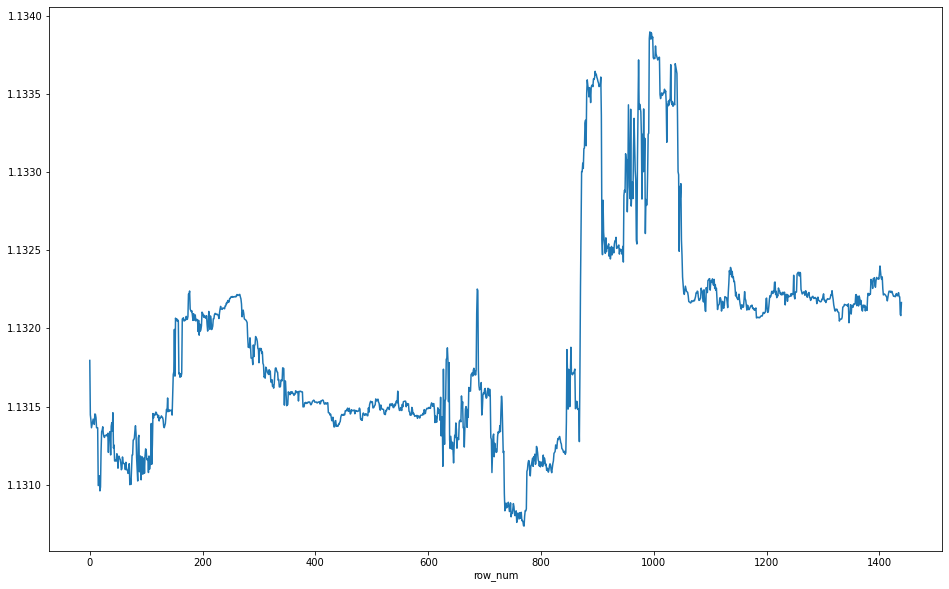

In [31]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120

ax = y_pred.plot(figsize = (16, 10)) 